In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4,suppress=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
from datetime import datetime
now = datetime.now()
now
now.year, now.month, now.day

datetime.datetime(2018, 8, 15, 6, 4, 53, 375990)

(2018, 8, 15)

In [3]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta
delta.days
delta.seconds

datetime.timedelta(926, 56700)

926

56700

In [5]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)
start - 2 * timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

datetime.datetime(2010, 12, 14, 0, 0)

In [6]:
stamp = datetime(2011, 1, 3)
str(stamp)
stamp.strftime('%Y-%m-%d')

'2011-01-03 00:00:00'

'2011-01-03'

In [8]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

datetime.datetime(2011, 1, 3, 0, 0)

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [9]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [11]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [12]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [13]:
datestrs= ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [14]:
idx = pd.to_datetime(datestrs + [None])
idx
idx[2]
pd.isnull(idx)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

NaT

array([False, False,  True])

In [16]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), 
        datetime(2011, 1, 7), datetime(2011, 1, 8), 
        datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.092908
2011-01-05    0.281746
2011-01-07    0.769023
2011-01-08    1.246435
2011-01-10    1.007189
2011-01-12   -1.296221
dtype: float64

In [17]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [18]:
ts + ts[::2]

2011-01-02    0.185816
2011-01-05         NaN
2011-01-07    1.538045
2011-01-08         NaN
2011-01-10    2.014379
2011-01-12         NaN
dtype: float64

In [19]:
ts.index.dtype

dtype('<M8[ns]')

In [20]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

In [21]:
stamp = ts.index[2]
ts[stamp]

0.7690225676118387

In [22]:
ts['1/10/2011']
ts['20110110']

1.0071893575830049

1.0071893575830049

In [24]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
longer_ts
longer_ts['2001']

2000-01-01   -0.072052
2000-01-02    0.544066
2000-01-03    0.323886
2000-01-04   -1.683325
2000-01-05    0.526860
2000-01-06    1.858791
2000-01-07   -0.548419
2000-01-08   -0.279397
2000-01-09   -0.021299
2000-01-10   -0.287990
                ...   
2002-09-17    0.453739
2002-09-18   -0.302450
2002-09-19    1.402558
2002-09-20    1.212354
2002-09-21   -1.613474
2002-09-22   -0.573966
2002-09-23    0.424894
2002-09-24    1.257544
2002-09-25   -1.065343
2002-09-26    0.276356
Freq: D, Length: 1000, dtype: float64

2001-01-01   -0.171724
2001-01-02   -0.827840
2001-01-03    0.370548
2001-01-04   -0.674167
2001-01-05   -1.712340
2001-01-06   -0.738151
2001-01-07    0.391813
2001-01-08    1.763403
2001-01-09   -0.054630
2001-01-10   -0.656506
                ...   
2001-12-22    0.207830
2001-12-23   -0.127188
2001-12-24    0.279477
2001-12-25    0.718729
2001-12-26   -0.531561
2001-12-27   -0.880247
2001-12-28   -0.376872
2001-12-29   -1.157682
2001-12-30   -0.125632
2001-12-31   -1.402235
Freq: D, Length: 365, dtype: float64

In [25]:
longer_ts['2001-05']

2001-05-01    0.251343
2001-05-02    1.624623
2001-05-03   -0.240567
2001-05-04    0.163052
2001-05-05   -0.586669
2001-05-06    0.414615
2001-05-07    0.427185
2001-05-08    1.172557
2001-05-09   -0.351572
2001-05-10    1.454593
                ...   
2001-05-22   -0.309119
2001-05-23    0.028558
2001-05-24    1.129605
2001-05-25   -0.374173
2001-05-26   -0.011401
2001-05-27    0.272924
2001-05-28   -0.601544
2001-05-29    0.574265
2001-05-30   -0.194115
2001-05-31    0.202225
Freq: D, Length: 31, dtype: float64

In [26]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.769023
2011-01-08    1.246435
2011-01-10    1.007189
2011-01-12   -1.296221
dtype: float64

In [27]:
ts
ts['1/6/2011':'1/11/2011']

2011-01-02    0.092908
2011-01-05    0.281746
2011-01-07    0.769023
2011-01-08    1.246435
2011-01-10    1.007189
2011-01-12   -1.296221
dtype: float64

2011-01-07    0.769023
2011-01-08    1.246435
2011-01-10    1.007189
dtype: float64

In [28]:
ts.truncate(after='1/9/2011')

2011-01-02    0.092908
2011-01-05    0.281746
2011-01-07    0.769023
2011-01-08    1.246435
dtype: float64

In [30]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100,4), index=dates, columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-1.652250,-1.612677,1.198021,0.318338
2001-05-09,0.262185,1.006644,0.674148,0.093842
2001-05-16,0.255735,0.190926,1.144932,-0.294869
2001-05-23,-0.200316,1.017884,-1.377053,-0.213328
2001-05-30,0.191668,-1.941714,-0.544435,2.194551


In [31]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [32]:
dup_ts.index.is_unique

False

In [34]:
dup_ts['1/3/2000']
dup_ts['1/2/2000']

4

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [35]:
grouped = dup_ts.groupby(level=0)
grouped.mean()
grouped.count()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [36]:
ts
resampler = ts.resample('D')

2011-01-02    0.092908
2011-01-05    0.281746
2011-01-07    0.769023
2011-01-08    1.246435
2011-01-10    1.007189
2011-01-12   -1.296221
dtype: float64

In [37]:
index = pd.date_range('2011-04-01', '2012-06-01')
index

DatetimeIndex(['2011-04-01', '2011-04-02', '2011-04-03', '2011-04-04',
               '2011-04-05', '2011-04-06', '2011-04-07', '2011-04-08',
               '2011-04-09', '2011-04-10',
               ...
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
               '2012-05-27', '2012-05-28', '2012-05-29', '2012-05-30',
               '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', length=428, freq='D')

In [38]:
pd.date_range(start='2012-04-01', periods=20)
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [39]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [40]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [41]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [42]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [43]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [45]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [46]:
Hour(2) + Minute(30)

<150 * Minutes>

In [48]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [50]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

In [52]:
ts = pd.Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts
ts.shift(2)
ts.shift(-2)

2000-01-31    1.219574
2000-02-29   -0.262202
2000-03-31    1.325639
2000-04-30    0.205656
Freq: M, dtype: float64

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.219574
2000-04-30   -0.262202
Freq: M, dtype: float64

2000-01-31    1.325639
2000-02-29    0.205656
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [53]:
ts.shift(2, freq='M')

2000-03-31    1.219574
2000-04-30   -0.262202
2000-05-31    1.325639
2000-06-30    0.205656
Freq: M, dtype: float64

In [55]:
ts.shift(3, freq='D')
ts.shift(1, freq='90T')

2000-02-03    1.219574
2000-03-03   -0.262202
2000-04-03    1.325639
2000-05-03    0.205656
dtype: float64

2000-01-31 01:30:00    1.219574
2000-02-29 01:30:00   -0.262202
2000-03-31 01:30:00    1.325639
2000-04-30 01:30:00    0.205656
Freq: M, dtype: float64

In [57]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [58]:
now + MonthEnd()
now + MonthEnd(2)

Timestamp('2011-11-30 00:00:00')

Timestamp('2011-12-31 00:00:00')

In [59]:
offset = MonthEnd()
offset.rollforward(now)
offset.rollback(now)

Timestamp('2011-11-30 00:00:00')

Timestamp('2011-10-31 00:00:00')

In [61]:
ts = pd.Series(np.random.randn(20), index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts
ts.groupby(offset.rollforward).mean()

2000-01-15    1.338642
2000-01-19    1.126556
2000-01-23    1.200261
2000-01-27    0.533212
2000-01-31   -0.469017
2000-02-04    0.333148
2000-02-08    0.133095
2000-02-12    1.403048
2000-02-16   -0.855701
2000-02-20    1.181299
2000-02-24   -0.573171
2000-02-28    1.291222
2000-03-03   -1.887990
2000-03-07    2.417577
2000-03-11    0.200645
2000-03-15   -1.149752
2000-03-19   -1.122790
2000-03-23    0.523177
2000-03-27   -0.578221
2000-03-31   -0.647204
Freq: 4D, dtype: float64

2000-01-31    0.745931
2000-02-29    0.416134
2000-03-31   -0.280570
dtype: float64

In [63]:
ts.resample('M').mean()

2000-01-31    0.745931
2000-02-29    0.416134
2000-03-31   -0.280570
Freq: M, dtype: float64

In [64]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [65]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [66]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    2.157700
2012-03-10 09:30:00   -0.405951
2012-03-11 09:30:00   -0.218444
2012-03-12 09:30:00   -0.161804
2012-03-13 09:30:00   -1.221525
2012-03-14 09:30:00    1.116641
Freq: D, dtype: float64

In [67]:
print(ts.index.tz)

None


In [68]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [69]:
ts
ts_utc = ts.tz_localize('UTC')
ts_utc
ts_utc.index

2012-03-09 09:30:00    2.157700
2012-03-10 09:30:00   -0.405951
2012-03-11 09:30:00   -0.218444
2012-03-12 09:30:00   -0.161804
2012-03-13 09:30:00   -1.221525
2012-03-14 09:30:00    1.116641
Freq: D, dtype: float64

2012-03-09 09:30:00+00:00    2.157700
2012-03-10 09:30:00+00:00   -0.405951
2012-03-11 09:30:00+00:00   -0.218444
2012-03-12 09:30:00+00:00   -0.161804
2012-03-13 09:30:00+00:00   -1.221525
2012-03-14 09:30:00+00:00    1.116641
Freq: D, dtype: float64

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [71]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    2.157700
2012-03-10 04:30:00-05:00   -0.405951
2012-03-11 05:30:00-04:00   -0.218444
2012-03-12 05:30:00-04:00   -0.161804
2012-03-13 05:30:00-04:00   -1.221525
2012-03-14 05:30:00-04:00    1.116641
Freq: D, dtype: float64

In [73]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 14:30:00+00:00    2.157700
2012-03-10 14:30:00+00:00   -0.405951
2012-03-11 13:30:00+00:00   -0.218444
2012-03-12 13:30:00+00:00   -0.161804
2012-03-13 13:30:00+00:00   -1.221525
2012-03-14 13:30:00+00:00    1.116641
Freq: D, dtype: float64

2012-03-09 15:30:00+01:00    2.157700
2012-03-10 15:30:00+01:00   -0.405951
2012-03-11 14:30:00+01:00   -0.218444
2012-03-12 14:30:00+01:00   -0.161804
2012-03-13 14:30:00+01:00   -1.221525
2012-03-14 14:30:00+01:00    1.116641
Freq: D, dtype: float64

In [75]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [76]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [77]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [78]:
stamp_utc.value
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

1299902400000000000

In [79]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp
stamp + Hour()

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [80]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp
stamp + 2*Hour()

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [82]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts1
ts2
result = ts1 + ts2
result.index

2012-03-07 09:30:00    0.567387
2012-03-08 09:30:00   -0.235968
2012-03-09 09:30:00   -0.739870
2012-03-12 09:30:00   -0.412543
2012-03-13 09:30:00   -1.535447
2012-03-14 09:30:00   -2.034712
2012-03-15 09:30:00    0.579498
2012-03-16 09:30:00   -2.261761
2012-03-19 09:30:00   -0.891224
2012-03-20 09:30:00   -1.953536
Freq: B, dtype: float64

2012-03-07 09:30:00+00:00    0.567387
2012-03-08 09:30:00+00:00   -0.235968
2012-03-09 09:30:00+00:00   -0.739870
2012-03-12 09:30:00+00:00   -0.412543
2012-03-13 09:30:00+00:00   -1.535447
2012-03-14 09:30:00+00:00   -2.034712
2012-03-15 09:30:00+00:00    0.579498
Freq: B, dtype: float64

2012-03-09 13:30:00+04:00   -0.739870
2012-03-12 13:30:00+04:00   -0.412543
2012-03-13 13:30:00+04:00   -1.535447
2012-03-14 13:30:00+04:00   -2.034712
2012-03-15 13:30:00+04:00    0.579498
Freq: B, dtype: float64

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [83]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [84]:
p + 5
p - 2

Period('2012', 'A-DEC')

Period('2005', 'A-DEC')

In [85]:
pd.Period('2014', freq='A-DEC')  - p

7

In [86]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [87]:
pd.Series(np.random.randn(6), index=rng)

2000-01    0.594454
2000-02    1.922484
2000-03   -0.357668
2000-04    0.266273
2000-05    0.560855
2000-06   -0.910333
Freq: M, dtype: float64

In [88]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [90]:
p = pd.Period('2007', freq='A-DEC')
p
p.asfreq('M', how='start')
p.asfreq('M', how='end')

Period('2007', 'A-DEC')

Period('2007-01', 'M')

Period('2007-12', 'M')

In [91]:
p = pd.Period('2007', freq='A-JUN')
p
p.asfreq('M', how='start')
p.asfreq('M', how='end')

Period('2007', 'A-JUN')

Period('2006-07', 'M')

Period('2007-06', 'M')

In [92]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [93]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.asfreq('M', how='start')

2006    2.272422
2007   -1.553641
2008   -0.502540
2009    0.567209
Freq: A-DEC, dtype: float64

2006-01    2.272422
2007-01   -1.553641
2008-01   -0.502540
2009-01    0.567209
Freq: M, dtype: float64

In [94]:
ts.asfreq('B', how='end')

2006-12-29    2.272422
2007-12-31   -1.553641
2008-12-31   -0.502540
2009-12-31    0.567209
Freq: B, dtype: float64

In [95]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [96]:
p.asfreq('D', 'start')
p.asfreq('D', 'end')

Period('2011-11-01', 'D')

Period('2012-01-31', 'D')

In [97]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm
p4pm.to_timestamp()

Period('2012-01-30 16:00', 'T')

Timestamp('2012-01-30 16:00:00')

In [98]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

In [99]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts
pts = ts.to_period()
pts

2000-01-31   -0.475457
2000-02-29    0.479696
2000-03-31   -1.320556
Freq: M, dtype: float64

2000-01   -0.475457
2000-02    0.479696
2000-03   -1.320556
Freq: M, dtype: float64

In [100]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2
ts2.to_period('M')

2000-01-29   -0.484352
2000-01-30    1.772486
2000-01-31   -1.677582
2000-02-01    0.412186
2000-02-02    1.575256
2000-02-03    0.846421
Freq: D, dtype: float64

2000-01   -0.484352
2000-01    1.772486
2000-01   -1.677582
2000-02    0.412186
2000-02    1.575256
2000-02    0.846421
Freq: M, dtype: float64

In [101]:
pts = ts2.to_period()
pts
pts.to_timestamp(how='end')

2000-01-29   -0.484352
2000-01-30    1.772486
2000-01-31   -1.677582
2000-02-01    0.412186
2000-02-02    1.575256
2000-02-03    0.846421
Freq: D, dtype: float64

2000-01-29   -0.484352
2000-01-30    1.772486
2000-01-31   -1.677582
2000-02-01    0.412186
2000-02-02    1.575256
2000-02-03    0.846421
Freq: D, dtype: float64

In [102]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)
data.year
data.quarter

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
        ...  
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
      ... 
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [103]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index
data.index = index
data.infl

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
          ... 
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [104]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.resample('M').mean()
ts.resample('M', kind='period').mean()

2000-01-01    1.369251
2000-01-02    0.584377
2000-01-03    0.785485
2000-01-04    2.056091
2000-01-05   -0.886559
2000-01-06   -0.569258
2000-01-07    0.486518
2000-01-08    0.772915
2000-01-09   -0.713474
2000-01-10   -1.552368
                ...   
2000-03-31    0.813568
2000-04-01    0.488321
2000-04-02    0.395433
2000-04-03    0.766159
2000-04-04    1.999486
2000-04-05    0.517431
2000-04-06   -0.756552
2000-04-07    1.171381
2000-04-08   -1.212491
2000-04-09   -0.399609
Freq: D, Length: 100, dtype: float64

2000-01-31    0.057593
2000-02-29   -0.171655
2000-03-31    0.212478
2000-04-30    0.329951
Freq: M, dtype: float64

2000-01    0.057593
2000-02   -0.171655
2000-03    0.212478
2000-04    0.329951
Freq: M, dtype: float64

In [105]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [106]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [107]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [108]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [109]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [110]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.325340,0.597205,0.039901,-0.75743
2000-01-12,1.698482,-0.434694,0.516461,-0.15322


In [111]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.325340,0.597205,0.039901,-0.75743
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.698482,-0.434694,0.516461,-0.15322


In [112]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.325340,0.597205,0.039901,-0.75743
2000-01-06,-0.325340,0.597205,0.039901,-0.75743
2000-01-07,-0.325340,0.597205,0.039901,-0.75743
2000-01-08,-0.325340,0.597205,0.039901,-0.75743
2000-01-09,-0.325340,0.597205,0.039901,-0.75743
2000-01-10,-0.325340,0.597205,0.039901,-0.75743
2000-01-11,-0.325340,0.597205,0.039901,-0.75743
2000-01-12,1.698482,-0.434694,0.516461,-0.15322


In [113]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.325340,0.597205,0.039901,-0.75743
2000-01-06,-0.325340,0.597205,0.039901,-0.75743
2000-01-07,-0.325340,0.597205,0.039901,-0.75743
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.698482,-0.434694,0.516461,-0.15322


In [114]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.325340,0.597205,0.039901,-0.75743
2000-01-13,1.698482,-0.434694,0.516461,-0.15322


In [115]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000-01,-0.452038,0.777409,-0.163869,-0.776469
2000-02,-1.229509,0.422435,1.412942,0.917802
2000-03,-0.183745,0.589207,1.024586,0.874961
2000-04,0.370509,-1.621348,0.053447,-0.421686
2000-05,1.050658,-0.173546,-0.443632,-0.630470


,Colorado,Texas,New York,Ohio
2000,0.040864,0.302574,0.503485,0.116698
2001,0.045090,-0.156065,-0.404013,-0.550784


In [116]:
annual_frame.resample('Q-DEC').ffill()
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.040864,0.302574,0.503485,0.116698
2000Q2,0.040864,0.302574,0.503485,0.116698
2000Q3,0.040864,0.302574,0.503485,0.116698
2000Q4,0.040864,0.302574,0.503485,0.116698
2001Q1,0.045090,-0.156065,-0.404013,-0.550784
2001Q2,0.045090,-0.156065,-0.404013,-0.550784
2001Q3,0.045090,-0.156065,-0.404013,-0.550784
2001Q4,0.045090,-0.156065,-0.404013,-0.550784


,Colorado,Texas,New York,Ohio
2000Q4,0.040864,0.302574,0.503485,0.116698
2001Q1,0.040864,0.302574,0.503485,0.116698
2001Q2,0.040864,0.302574,0.503485,0.116698
2001Q3,0.040864,0.302574,0.503485,0.116698
2001Q4,0.045090,-0.156065,-0.404013,-0.550784


In [117]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.040864,0.302574,0.503485,0.116698
2001Q1,0.040864,0.302574,0.503485,0.116698
2001Q2,0.040864,0.302574,0.503485,0.116698
2001Q3,0.040864,0.302574,0.503485,0.116698
2001Q4,0.045090,-0.156065,-0.404013,-0.550784
2002Q1,0.045090,-0.156065,-0.404013,-0.550784
2002Q2,0.045090,-0.156065,-0.404013,-0.550784
2002Q3,0.045090,-0.156065,-0.404013,-0.550784


In [118]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

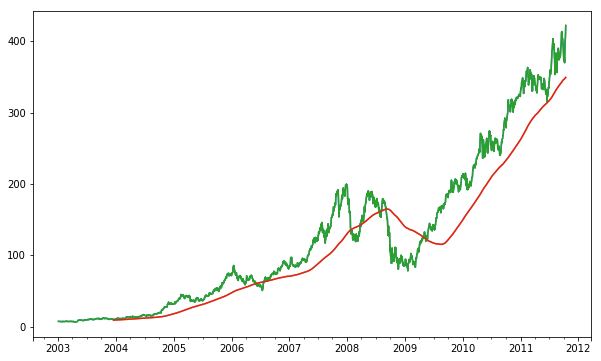

In [120]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()
plt.show()

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

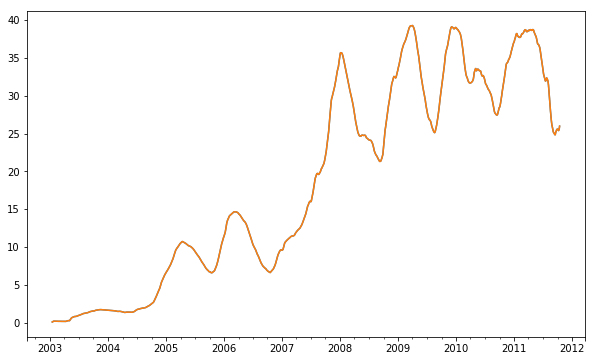

In [122]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]
appl_std250.plot()
plt.show()

In [123]:
expanding_mean = appl_std250.expanding().mean()

C:\Users\Sid\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


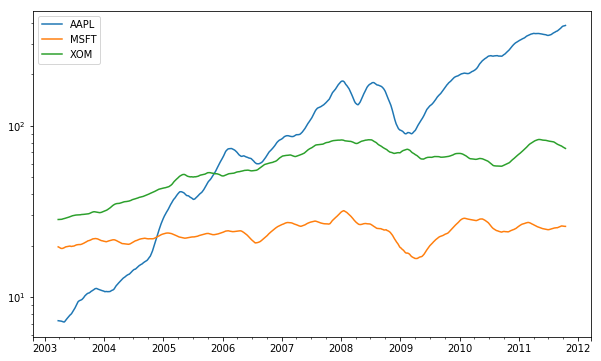

In [124]:
close_px.rolling(60).mean().plot(logy=True)
plt.show()

In [125]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


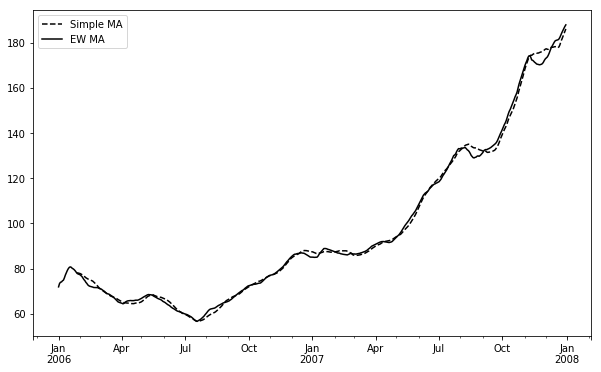

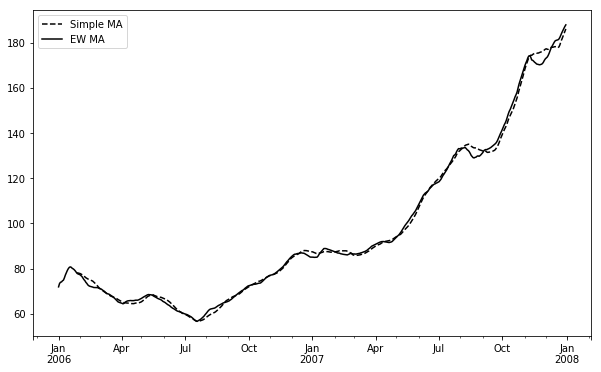

In [127]:
plt.figure()
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()
plt.show()

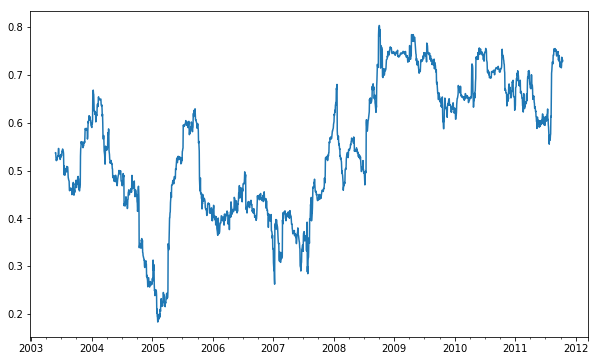

In [131]:
plt.figure()
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()
plt.show()

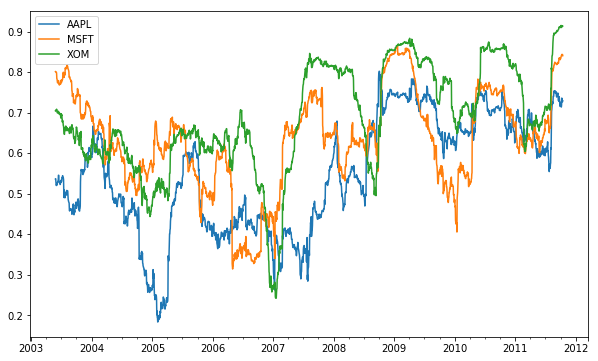

In [134]:
# plt.figure()
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()
plt.show()

C:\Users\Sid\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  app.launch_new_instance()


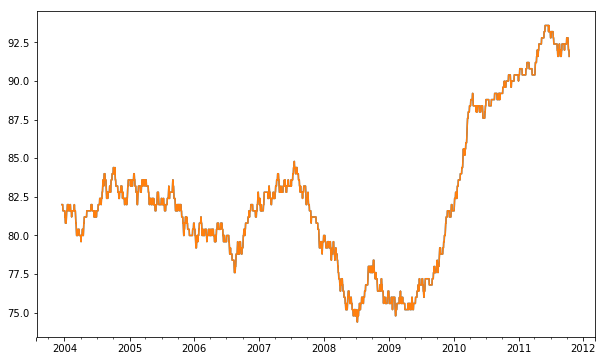

In [136]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()
plt.show()

In [137]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS